# **Evaluating Classification Models**

There are multiple evalution metrics which we can use. Some of them are:
- **Confusion Matrix**
- **Classification Accuracy**

---
---

## **Preparing Data**

### Importing Libraries

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np

### Fetching data

In [2]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target'].astype(np.uint8)

### Splitting the data into *Train* and *Test* sets

In [3]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

---
---

## **Training a Binary Classifier**

Since our target values belong to multiple classes, let's just create a binary classifier in order to simply the classification process

In [4]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

### Initializing the model

In [5]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

### Getting predictions
*(Instead of getting predictions directly we can actually use `cross_val_predict` method to get predictions. It performs K-fold cross validation, but 
instead of returning scores, it returns predictions made on each test fold)*

In [6]:
from sklearn.model_selection import cross_val_predict

y_pred_5 = cross_val_predict(estimator=sgd_clf,
                            X=X_train,
                            y=y_train_5,
                            verbose=2,
                            cv=3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   21.6s finished


---
---

## **Evaluating Performance**

### **Confusion Matrix**

- The general idea is to count the number of times instances of class A are classified as class B
- It is represented as:
![Confusion Matrix](../Resources/confusion-matrix.png)

For simplicity, we will consider our example for 5 images *(5s)* and non-5 images *(non-5s)*

- True Positive: Predictions which were correctly classified as a positive class *(correctly classified as 5s)*
- False Positive: Predictions which were wrongly classified as a positive class *(wrongly classified as 5s)*
- True Negative: Predictions which were correctly classified as negative class *(correctly classified as 5s)*
- False Negative: Predictions which were wrongly classified as a negative class *(wrongly classified as non-5s)*

In [7]:
from sklearn.metrics import confusion_matrix

predicted_confusion_matrix = confusion_matrix(y_train_5, y_pred_5)
print(predicted_confusion_matrix)

[[53892   687]
 [ 1891  3530]]


Here we can see:
- 53,892 images were correctly classifed as 5s
- 687 images were incorrectly classified as 5s
- 3,530 images were correctly classified as non-5s
- 1,891 images were incorrectly classified as non-5s

The confusion matrix gives us a lot of information but sometimes we may need more concise metrics in order to understand the performance of the model

---

### **Classification Accuracy**

- It is the total accurate predictions divided by the total values
- In terms of confusion matrix it is:  $\frac {TP + TN}{Total Values}$
- It can be misleading when there are very few true cases *(like in our example, since there are few 5s)*




In [8]:
from sklearn.metrics import accuracy_score

predicted_accuracy_score = accuracy_score(y_train_5, y_pred_5)
print(f'Predicted Accuracy Score: {predicted_accuracy_score}')

Predicted Accuracy Score: 0.9570333333333333


---

### **Precision Score**

- It is the total of true predictions over the total true values
- In terms of confusion matrix it is: $\frac{TP}{TP + FP}$
- If there is just one positive class and if the model was able to predict that one class class correctly but couldn't predict the negative class then also the precision score would be 100%, that's why it's accompanied by another metric called *Recall Score*

In [9]:
from sklearn.metrics import precision_score

predicted_precision_score = precision_score(y_train_5, y_pred_5)
print(f'Predicted Precision Score: {predicted_precision_score}')

Predicted Precision Score: 0.8370879772350012


We can see when our model claims that an image is 5, it's correct only 83.7% times

---

### **Recall Score**

- It's also called *Sensitivity* or *True Positive Rate (TPR)*
- It is the ratio of positive instances that are correctly detected by the classifier
- In terms of confusion matrix it is: $\frac{TP}{TP + FN}$

In [10]:
from sklearn.metrics import recall_score

predicted_recall_score = recall_score(y_train_5, y_pred_5)
print(f'Predicted Recall Score: {predicted_recall_score}')

Predicted Recall Score: 0.6511713705958311


We can see that our model is only able to detect 65% of the 5s

---

### **F1 Score**

- It's often convenient to combine *Precision* and *Recall* scores into one metric
- It is the harmonic mean of *Precision* and *Recall*
- That means it gives much more weight to the low values. As a result, the classifier will only get high $F_{1}$ score if both recall and precision are high
    - You can't have high values for both *Precision* and *Recall*
    - There is a trade-off between these two metrics. If you try to increase one, the other will decrease.
    - You will have to choose to optimize one depending on the use case and try to get the best possible score of the other one
- In terms of confusion matrix it is: $2 * \frac {Precision * Recall} {Precision + Recall}$

In [11]:
from sklearn.metrics import f1_score

predicted_f1_score = f1_score(y_train_5, y_pred_5)
print(f'Predicted F1 Score: {predicted_f1_score}')

Predicted F1 Score: 0.7325171197343846


---

### **Precision-Recall Curve**

- In order to understand the threshold where you want your *Precision* and *Recall* scores to be, scikit-learn provides a method called `precision_recall_curve`
- It provides you with *precision*, *recall* and *threshold* values which you can then plot to better visualize the result
- We need the scores for all the instances, we can use `cross_val_predict` with the `method` set to "decision_function" to get that

In [12]:
from sklearn.metrics import precision_recall_curve

y_scores_5 = cross_val_predict(estimator=sgd_clf,
                              X=X_train,
                              y=y_train_5,
                              cv=3,
                              method='decision_function')

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores_5)

Visualizing the result:

*(we will create a function to plot the result so that it can be used again if needed)*

In [13]:
import matplotlib.pyplot as plt

def plot_precision_recall_vs_threshold(precisios, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.title('Precision and Recall vs Threshold', fontsize=20)
    plt.xlabel('Threshold', fontsize=16)
    plt.legend(loc='center right', fontsize=16)
    plt.grid()
    plt.axis([-50000, 50000, 0, 1])

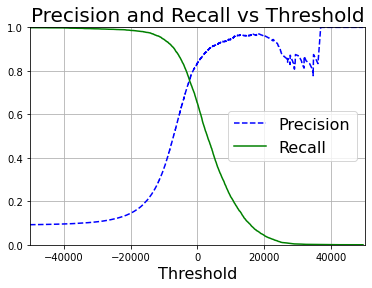

In [14]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

---

### **Reciever Operating Characteristic *(ROC)* Curve**

- The *ROC* Curve is another common tool used for *Binary Classifiers*
- It plots Recall *(also called True Positive Rate/Sensitivity)* against False Positive Rate *(FPR)*
- False Positive Rate is the ratio of negative instances that are incorrectly classified as positive
    - Which is $1 - True Negative Rate$
    - True Negative Rate *(TNR)* is the ratio of negative instances that are correctly classified as negative
    - TNR is also called *Specificity*
- Thus, ROC curve plots *Sensitivity* versus *1 - Specificity*
- Scikit-Learn provides `roc_curve` method which returns *FPR*, *TPR* and *Thresholds*, which can be then plottted

In [15]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores_5)

In [16]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate (Fall out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.title('ROC Curve', fontsize=20)
    plt.grid()
    plt.axis([0, 1, 0, 1])

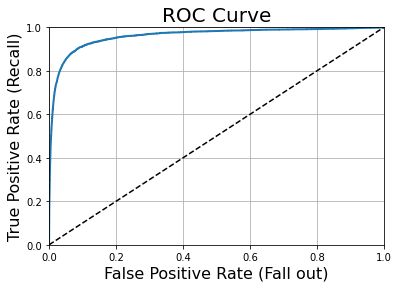

In [17]:
plot_roc_curve(fpr, tpr)
plt.show()

**NOTE:**
- You should prefer the PR Curve whenever the positive class is rare or when you care more about the false positives than the false negatives.

---

### **Area Under Curver *(AUC)***

- It is the area under the ROC curve
- The best AUC score any model can have is 1
- A pretty random classifier will have a ROC AUC of 0.5
- Scikit-learn provides a method to calculate it, `roc_auc_score`

In [18]:
from sklearn.metrics import roc_auc_score

predicted_auc_score = roc_auc_score(y_train_5, y_scores_5)
print(f'Predicted AUC Score: {predicted_auc_score}')

Predicted AUC Score: 0.9604938554008616


---
---

# **Conclusion**

There is no one solution fit all situation here. We need to define our requirements clearly and then choose a metric based on that